In [90]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [93]:
dataset = loadtxt('pima-indians-diabetes.csv',delimiter = ',')

In [94]:
dataset

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

In [95]:
X=dataset[:,0:8]
y = dataset[:,-1]

In [96]:
SEED = 7
test_size=0.33
X_train,X_test, y_train,y_test=train_test_split(X,y,test_size = test_size, random_state=SEED)

In [97]:
model=XGBClassifier()
model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [99]:
y_pred =model.predict(X_test)
predictions=[round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print('Accuracy:',accuracy* 100)

Accuracy: 77.95275590551181


 # using eval_set

In [100]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [101]:
rawdata=loadtxt('pima-indians-diabetes.csv',delimiter=',')

X=rawdata[:,0:8]
y=rawdata[:,-1]

In [102]:
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state = 7)

In [103]:
model=XGBClassifier()
eval_set = [(X_test,y_test)]
model.fit(X_train,y_train,early_stopping_rounds=10, eval_metric = 'logloss',eval_set=eval_set,verbose=True)

[0]	validation_0-logloss:0.660186
Will train until validation_0-logloss hasn't improved in 10 rounds.
[1]	validation_0-logloss:0.634854
[2]	validation_0-logloss:0.612239
[3]	validation_0-logloss:0.593118
[4]	validation_0-logloss:0.578303
[5]	validation_0-logloss:0.564942
[6]	validation_0-logloss:0.555113
[7]	validation_0-logloss:0.54499
[8]	validation_0-logloss:0.539151
[9]	validation_0-logloss:0.531819
[10]	validation_0-logloss:0.526065
[11]	validation_0-logloss:0.51977
[12]	validation_0-logloss:0.514979
[13]	validation_0-logloss:0.50927
[14]	validation_0-logloss:0.506086
[15]	validation_0-logloss:0.503565
[16]	validation_0-logloss:0.503591
[17]	validation_0-logloss:0.500805
[18]	validation_0-logloss:0.497605
[19]	validation_0-logloss:0.495328
[20]	validation_0-logloss:0.494777
[21]	validation_0-logloss:0.494274
[22]	validation_0-logloss:0.493333
[23]	validation_0-logloss:0.492211
[24]	validation_0-logloss:0.491936
[25]	validation_0-logloss:0.490578
[26]	validation_0-logloss:0.490895


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [104]:
y_pred=model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [105]:
accuracy = accuracy_score(y_test, predictions) 
print('Accuracy:', accuracy)

Accuracy: 0.7755905511811023


In [106]:
from xgboost import plot_importance
from matplotlib import pyplot

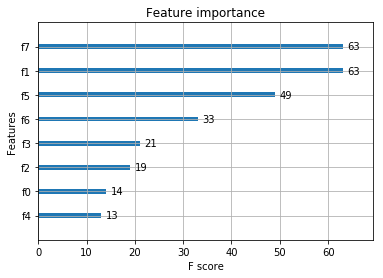

In [107]:
plot_importance(model)
pyplot.show()

## Tune learning_rate

In [108]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

In [109]:
from sklearn.model_selection import GridSearchCV

In [110]:
rawdata=loadtxt('pima-indians-diabetes.csv',delimiter=',')
X=rawdata[:,0:8]
y=rawdata[:,-1]

In [111]:
model = XGBClassifier()
learning_rate=[0.0001,0.001,0.01,0.1,0.2,0.3]
param_grid=dict(learning_rate=learning_rate)
kfold = StratifiedKFold(n_splits=10,shuffle=True, random_state = 7)

In [112]:
grid_search = GridSearchCV(model,param_grid,scoring='neg_log_loss',n_jobs=-1, cv=kfold)
grid_result= grid_search.fit(X,y)
print('Best:',grid_result.best_score_, 'using:',grid_result.best_params_)
means = grid_result.cv_results_['mean_test_score']
params =grid_result.cv_results_['params']
for mean,param in zip(means,params):
    print(" %f with: %r " % (mean, param))

Best: -0.4833037719960582 using: {'learning_rate': 0.1}
 -0.689811 with: {'learning_rate': 0.0001} 
 -0.661827 with: {'learning_rate': 0.001} 
 -0.531155 with: {'learning_rate': 0.01} 
 -0.483304 with: {'learning_rate': 0.1} 
 -0.515642 with: {'learning_rate': 0.2} 
 -0.554158 with: {'learning_rate': 0.3} 


In [115]:
xgb1=XGBClassifier(learning_rate = 0.1)

In [116]:
xgb1.fit(X_train,y_train)
y_pred =xgb1.predict(X_test)
predictions=[round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print('Accuracy:',accuracy* 100)

Accuracy: 77.95275590551181
